<a href="https://colab.research.google.com/github/JohnYCLam/MachineLearning/blob/main/TensorFlow_and_PyTorch_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Character Level Model Generation

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, SimpleRNN, GRU, LSTM, Lambda, Reshape, SimpleRNNCell
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
with open("dinos.txt", "r") as f:
    names = f.read().lower().splitlines()

# Create character mapping
chars = sorted(set("".join(names)))  # Unique characters in dataset
chars.append("<EOS>")  # Special end-of-sequence token
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for ch, i in char_to_idx.items()}
vocab_size = len(chars)

# Prepare training sequences
max_length = max(len(name) for name in names)  # Find longest name
X_train, y_train = [], []

for name in names:
    x_seq = [char_to_idx[ch] for ch in name]  # Convert to indices
    y_seq = x_seq[1:] + [char_to_idx["<EOS>"]]  # Shift left for output

    # Pad sequences to max_length
    x_seq += [char_to_idx["<EOS>"]] * (max_length - len(x_seq))
    y_seq += [char_to_idx["<EOS>"]] * (max_length - len(y_seq))

    X_train.append(x_seq)
    y_train.append(y_seq)

X_train = np.array(X_train)
y_train = np.array(y_train)

# One-hot encode input data
X_train_one_hot = np.eye(vocab_size)[X_train]  # Convert to one-hot vectors

# Build the RNN Model (Without Embedding Layer)
model = tf.keras.Sequential([
    Input(shape=(max_length, vocab_size)),  # Input is one-hot encoded
    SimpleRNN(128, return_sequences=True),
    Dense(vocab_size, activation="softmax")  # Output probability for each character
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(X_train_one_hot, y_train, epochs=100, batch_size=32)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4826 - loss: 2.0400
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.6746 - loss: 1.1725
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7127 - loss: 1.0430
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7226 - loss: 0.9822
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7320 - loss: 0.9401
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7434 - loss: 0.8994
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7483 - loss: 0.8775
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7546 - loss: 0.8555
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7555 - loss: 0.8374
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7618 - loss: 0.8156
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.7680 - loss: 0.7957
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step

In [ ]:
def generate_name(seed_char="a", max_length=20):
    name = seed_char
    for _ in range(max_length):
        x_input = np.array([[char_to_idx[ch] for ch in name] + [char_to_idx["<EOS>"]] * (max_length - len(name))])
        x_input_one_hot = np.eye(vocab_size)[x_input]  # One-hot encode input
        pred_probs = model.predict(x_input_one_hot, verbose=0)[0]
        next_char_idx = np.argmax(pred_probs[len(name) - 1])  # Pick most probable character
        next_char = idx_to_char[next_char_idx]

        if next_char == "<EOS>":
            break  # Stop if end token is predicted
        name += next_char

    return name.capitalize()

# Generate new dinosaur names
for _ in range(10):
    print(generate_name(np.random.choice(chars[:-1])))  # Avoid starting with <EOS>


Changnengousaurus
Raptorrothosur
Gantonsaurus
Yungongcenator
Huangasaurus
Xiangaugnosaurus
Saurophata
Jiangjunosaurus
Quelacon
Changnengousaurus


In [ ]:
f = open('dinos.txt')

corpus = []
max_word_length = 0
list_of_chars = []

for word in f:
    word = word.lower().replace('\n', '')
    corpus.append(list(word))
    for char in word:
        list_of_chars.append(char)
    if len(word) > max_word_length:
        max_word_length = len(word)

list_of_chars = list(set(list_of_chars))
#list_of_chars.append('<sos>')
list_of_chars.sort()
list_of_chars.append('<eos>')

list_of_chars.insert(0, '<sos>')

In [ ]:
index_to_char = {key: value for key, value in enumerate(list_of_chars)}
char_to_index = {value: key for key, value in enumerate(list_of_chars)}

In [ ]:
N = len(corpus)
T = max_word_length
D = len(list_of_chars)
X_one_hot = np.zeros((N, T + 1, D))
y_one_hot = np.zeros((N, T + 1, D))

for i, word in enumerate(corpus):
    word_one_hot = np.zeros((T + 1, D))
    for j, char in enumerate(word):
        word_one_hot[j, char_to_index[char]] = 1

    word_one_hot[len(word):, char_to_index['<eos>']] = 1

    X_one_hot[i, 1 : , :] = word_one_hot[: -1, :]
    X_one_hot[i, 0, char_to_index['<sos>']] = 1
    y_one_hot[i, :, :] = word_one_hot[:, :]
    y_one_hot[i, len(word), char_to_index['<eos>']] = 1

In [ ]:
n_a = 100

char_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(T + 1, D)),  # Correct input shape
    tf.keras.layers.SimpleRNN(n_a, activation = 'relu', return_sequences=True), # return_sequences=True is crucial
    tf.keras.layers.Dense(D, activation='softmax')
])


In [ ]:
char_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_12 (SimpleRNN)            │ (None, 27, 100)             │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 27, 28)              │           2,828 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,728 (61.44 KB)

 Trainable params: 15,728 (61.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = Adam(learning_rate = 0.01, )

char_model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
char_model.fit(X_one_hot, y_one_hot, epochs = 100, batch_size = 32)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5426 - loss: 1.6830
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7214 - loss: 0.9521
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7429 - loss: 0.8697
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7524 - loss: 0.8278
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7595 - loss: 0.8100
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7691 - loss: 0.7751
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7723 - loss: 0.7576
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7756 - loss: 0.7453
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7812 - loss: 0.7242
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7842 - loss: 0.7163
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7848 - loss: 0.7176
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

In [ ]:
def generate_name(model, T, D, index_to_char, char_to_index):
    x = np.zeros((1, T + 1, D))
    x[0, 0, char_to_index['<sos>']] = 1
    generated_name = ""

    for t in range(T):
        probs = model.predict(x[:, :t+1, :])[0, t, :]

        probs[char_to_index['<sos>']] = 0
        probs = probs / np.sum(probs)
        next_index = np.random.choice(range(D), p=probs)
        next_char = index_to_char[next_index]

        if next_char == '<eos>':
            break

        generated_name += next_char
        x[0, t+1, next_index] = 1

    return generated_name


for _ in range(10):
    print(generate_name(char_model, T, D, index_to_char, char_to_index))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
minonodon
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


# Time Series Prediction

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, SimpleRNN, GRU, LSTM, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import itertools

In [ ]:
def generate_time_series(n_steps = 120, trend_min = 2.0, trend_max = 10.0, trend_var = 0.1, season_period = None, season_cycle = None, season_var = None):

    trends = np.linspace(trend_min, trend_max, n_steps) + trend_var * np.random.randn(n_steps)

    if season_period is None:
        seasonalities = 0
    else:
        seasonalities = np.sin(np.linspace(0, season_period * season_cycle - 1, n_steps) * (2 *np.pi / season_period)) + season_var * np.random.randn(n_steps)

    time_series = trends + seasonalities
    return trends, seasonalities, time_series

In [ ]:
def plot_time_series(trends, seasonalities, time_series):
    fig, ax = plt.subplots(1, 3, figsize = (9, 3))
    ax[0].plot(trends)
    ax[0].set_title('trends')
    ax[1].plot(seasonalities)
    ax[1].set_title('seasonalities')
    ax[2].plot(time_series)
    ax[2].set_title('time series')
    fig.tight_layout()
    plt.show();

In [ ]:
def create_time_seq(time_series, T, D):
    X = []
    Y = []

    for t in range(len(time_series) - T):
        x = time_series[t: t + T, :]
        X.append(x)

        y = time_series[t + T, :]
        Y.append(y)

    X = np.array(X).reshape(-1, T, D) # N x T x D
    Y = np.array(Y).reshape(-1)

    return X, Y

In [ ]:
def prepare_dataset(time_series, T = 12, D = 1, split = 0.8, scaler = None):

    split = int(time_series.shape[0] * split)

    time_series = time_series.reshape(-1, D)
    time_series_train = time_series[: split]
    time_series_test = time_series[split: ]

    if scaler is not None:
        time_series_train = scaler.fit_transform(time_series_train)
        time_series_test = scaler.transform(time_series_test)

    X_train, y_train = create_time_seq(time_series_train, T, D)

    X_test, y_test = create_time_seq(time_series_test, T, D)

    #print(f'Shape of X: {X.shape} | Shape of Y: {Y.shape}')
    print(f'Shape of X Train: {X_train.shape} | Shape of Y Train: {y_train.shape}')
    print(f'Shape of X Test: {X_test.shape} | Shape of Y Test: {y_test.shape}')

    return X_train, y_train, X_test, y_test

In [ ]:
def in_sample_predict(model, data):
    in_sample_predictions = []
    for i in range(len(data)):
        prediction = model.predict(data[i].reshape(1, -1, 1), verbose = 0)[0, 0]
        in_sample_predictions.append(prediction)

    return in_sample_predictions

In [ ]:
def out_of_sample_predict(model, last_input, future_steps):
    out_of_sample_predictions = []

    while len(out_of_sample_predictions) < future_steps:
        predict = model.predict(last_input.reshape(1, -1, 1), verbose = 0)[0, 0]

        out_of_sample_predictions.append(predict)

        last_input = np.roll(last_input, -1)
        last_input[-1] = predict
    return out_of_sample_predictions

In [ ]:
def plot_predictions(time_series, T, X_train_predictions, X_test_predictions, out_of_sample_predictions, future_steps, figsize = (8, 4), scaler = None, title = None):
    if scaler is not None:
        X_train_predictions = (scaler.inverse_transform([X_train_predictions])).reshape(-1)
        X_test_predictions = (scaler.inverse_transform([X_test_predictions])).reshape(-1)
        out_of_sample_predictions = (scaler.inverse_transform([out_of_sample_predictions]).reshape(-1))

    plt.figure(figsize = figsize)
    plt.plot(range(len(time_series)), time_series, label = 'time series data', color = 'black', linestyle = 'dashed')
    #plt.plot(range(T, T + len(y_train)), y_train, label = 'train data')
    #plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label = 'test data')
    plt.plot(range(T, T + len(X_train_predictions)), X_train_predictions, label = 'in-sample train prediction')
    plt.plot(range(2 * T + len(X_train_predictions), 2 * T + len(X_train_predictions) + len(X_test_predictions)), X_test_predictions, label = 'in-sample test prediction', color = 'red')
    plt.plot(range(2 * T + len(X_train_predictions) + len(X_test_predictions), 2 * T + len(X_train_predictions) + len(X_test_predictions) + future_steps - 1), out_of_sample_predictions[1:], label = 'out-of-sample prediction', color = 'green')
    plt.axvline(x = 2 * T + len(X_train_predictions) + len(X_test_predictions), color='gray', linestyle='--', label="Forecast Start")
    plt.title(title)
    plt.legend()


In [ ]:
def subplot_predictions(ax, time_series, T, X_train_predictions, X_test_predictions, out_of_sample_predictions, future_steps, figsize = (8, 4), scaler = None, title = None):
    if scaler is not None:
        X_train_predictions = (scaler.inverse_transform([X_train_predictions])).reshape(-1)
        X_test_predictions = (scaler.inverse_transform([X_test_predictions])).reshape(-1)
        out_of_sample_predictions = (scaler.inverse_transform([out_of_sample_predictions]).reshape(-1))

    #ax.figure(figsize = figsize)
    ax.plot(range(len(time_series)), time_series, label = 'time series data', color = 'black', linestyle = 'dashed')
    #plt.plot(range(T, T + len(y_train)), y_train, label = 'train data')
    #plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label = 'test data')
    ax.plot(range(T, T + len(X_train_predictions)), X_train_predictions, label = 'in-sample train prediction')
    ax.plot(range(2 * T + len(X_train_predictions), 2 * T + len(X_train_predictions) + len(X_test_predictions)), X_test_predictions, label = 'in-sample test prediction', color = 'red')
    ax.plot(range(2 * T + len(X_train_predictions) + len(X_test_predictions), 2 * T + len(X_train_predictions) + len(X_test_predictions) + future_steps - 1), out_of_sample_predictions[1:], label = 'out-of-sample prediction', color = 'green')
    ax.axvline(x = 2 * T + len(X_train_predictions) + len(X_test_predictions), color='gray', linestyle='--', label="Forecast Start")
    ax.set_title(title)
    ax.legend()

In [ ]:
def rnn_model(T, D, activation, optimizer):
    # i = Input(shape = (T, D))
    # x = SimpleRNN(120, return_sequences = True, activation = 'relu')(i)
    # x = SimpleRNN(60, activation = activation)(i)
    # x = Dense(1)(x)

    # model = Model(i, x)

    # i = Input(shape = (T, D))
    # x = Conv1D(filters = 16, kernel_size = 3, activation = 'relu')(i)
    # x = MaxPooling1D(pool_size = 2)(x)
    # x = GRU(100, activation = 'tanh', return_sequences = True)(x)
    # x = GRU(100, activation = 'relu', return_sequences = False)(x)
    # x = Dense(1)(x)
    # model = Model(i, x)

    i = Input(shape = (T, D))
    x_1 = Conv1D(filters = 60, kernel_size = 3, activation = 'relu', padding = 'same')(i)
    x_1 = MaxPooling1D(pool_size = 2, strides = 1, padding = 'same')(x_1)
    x_2 = GRU(60, activation = 'relu', return_sequences = True)(i)
    x = Add()([x_1, x_2])
    x = GRU(60, activation = 'relu', return_sequences = False)(x)
    x = Dense(1)(x)

    model = Model(i, x)

    model.compile(loss = 'mean_squared_error', optimizer = optimizer)

    return model


In [ ]:
def experiment(D, Ts, scalers, activations, weight_decays, learning_rates = [0.01], future_steps = 50):
    parameters = list(itertools.product(Ts, scalers, activations, weight_decays, learning_rates))

    cols = 4
    rows = int(round(len(parameters)//cols))

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 5))
    axs = axs.flatten()

    for i, (T, scaler, activation, weight_decay, learning_rate) in enumerate(parameters):
        X_train, y_train, X_test, y_test = prepare_dataset(time_series, T, D,
                                                   scaler = scaler
                                                   )
        model = rnn_model(T, D, activation, optimizer = SGD(learning_rate = learning_rate, weight_decay = weight_decay))

        result = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 16, epochs = 30, verbose = 0)

        X_train_predictions = in_sample_predict(model, X_train)
        X_test_predictions = in_sample_predict(model, X_test)

        out_of_sample_predictions = out_of_sample_predict(model, X_test[-1], future_steps)

        subplot_predictions(axs[i], time_series, T, X_train_predictions, X_test_predictions, out_of_sample_predictions, future_steps, scaler = scaler, title = f"Timesteps: {T} | {scaler} | {activation}\nweight decay: {weight_decay} | val loss: {result.history['val_loss'][-1]:.4f}")
    plt.tight_layout()
    plt.show()

## Predicting Trends Only

In [ ]:
n_steps = 300
trend_min = 2.0
trend_max = 10.0
trend_var = 0.1

trends, seasonalities, time_series = generate_time_series(n_steps = n_steps,
                                                        trend_min = trend_min,
                                                        trend_max = trend_max,
                                                        trend_var = trend_var,
                                                        )

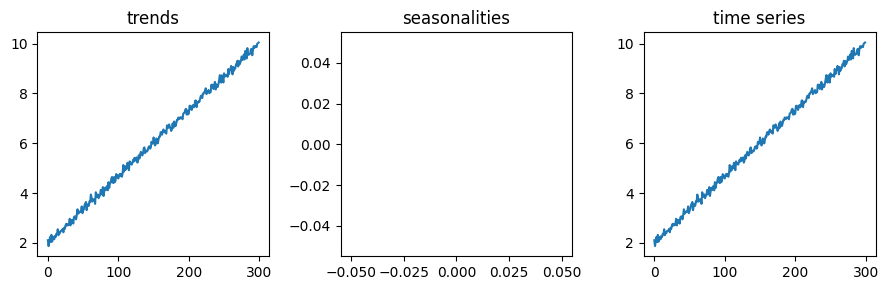

In [ ]:
plot_time_series(trends, seasonalities, time_series)

Shape of X Train: (234, 6, 1) | Shape of Y Train: (234,)
Shape of X Test: (54, 6, 1) | Shape of Y Test: (54,)
Shape of X Train: (234, 6, 1) | Shape of Y Train: (234,)
Shape of X Test: (54, 6, 1) | Shape of Y Test: (54,)
Shape of X Train: (234, 6, 1) | Shape of Y Train: (234,)
Shape of X Test: (54, 6, 1) | Shape of Y Test: (54,)
Shape of X Train: (234, 6, 1) | Shape of Y Train: (234,)
Shape of X Test: (54, 6, 1) | Shape of Y Test: (54,)
Shape of X Train: (234, 6, 1) | Shape of Y Train: (234,)
Shape of X Test: (54, 6, 1) | Shape of Y Test: (54,)
Shape of X Train: (234, 6, 1) | Shape of Y Train: (234,)
Shape of X Test: (54, 6, 1) | Shape of Y Test: (54,)
Shape of X Train: (234, 6, 1) | Shape of Y Train: (234,)
Shape of X Test: (54, 6, 1) | Shape of Y Test: (54,)
Shape of X Train: (234, 6, 1) | Shape of Y Train: (234,)
Shape of X Test: (54, 6, 1) | Shape of Y Test: (54,)
Shape of X Train: (234, 6, 1) | Shape of Y Train: (234,)
Shape of X Test: (54, 6, 1) | Shape of Y Test: (54,)
Shape of X

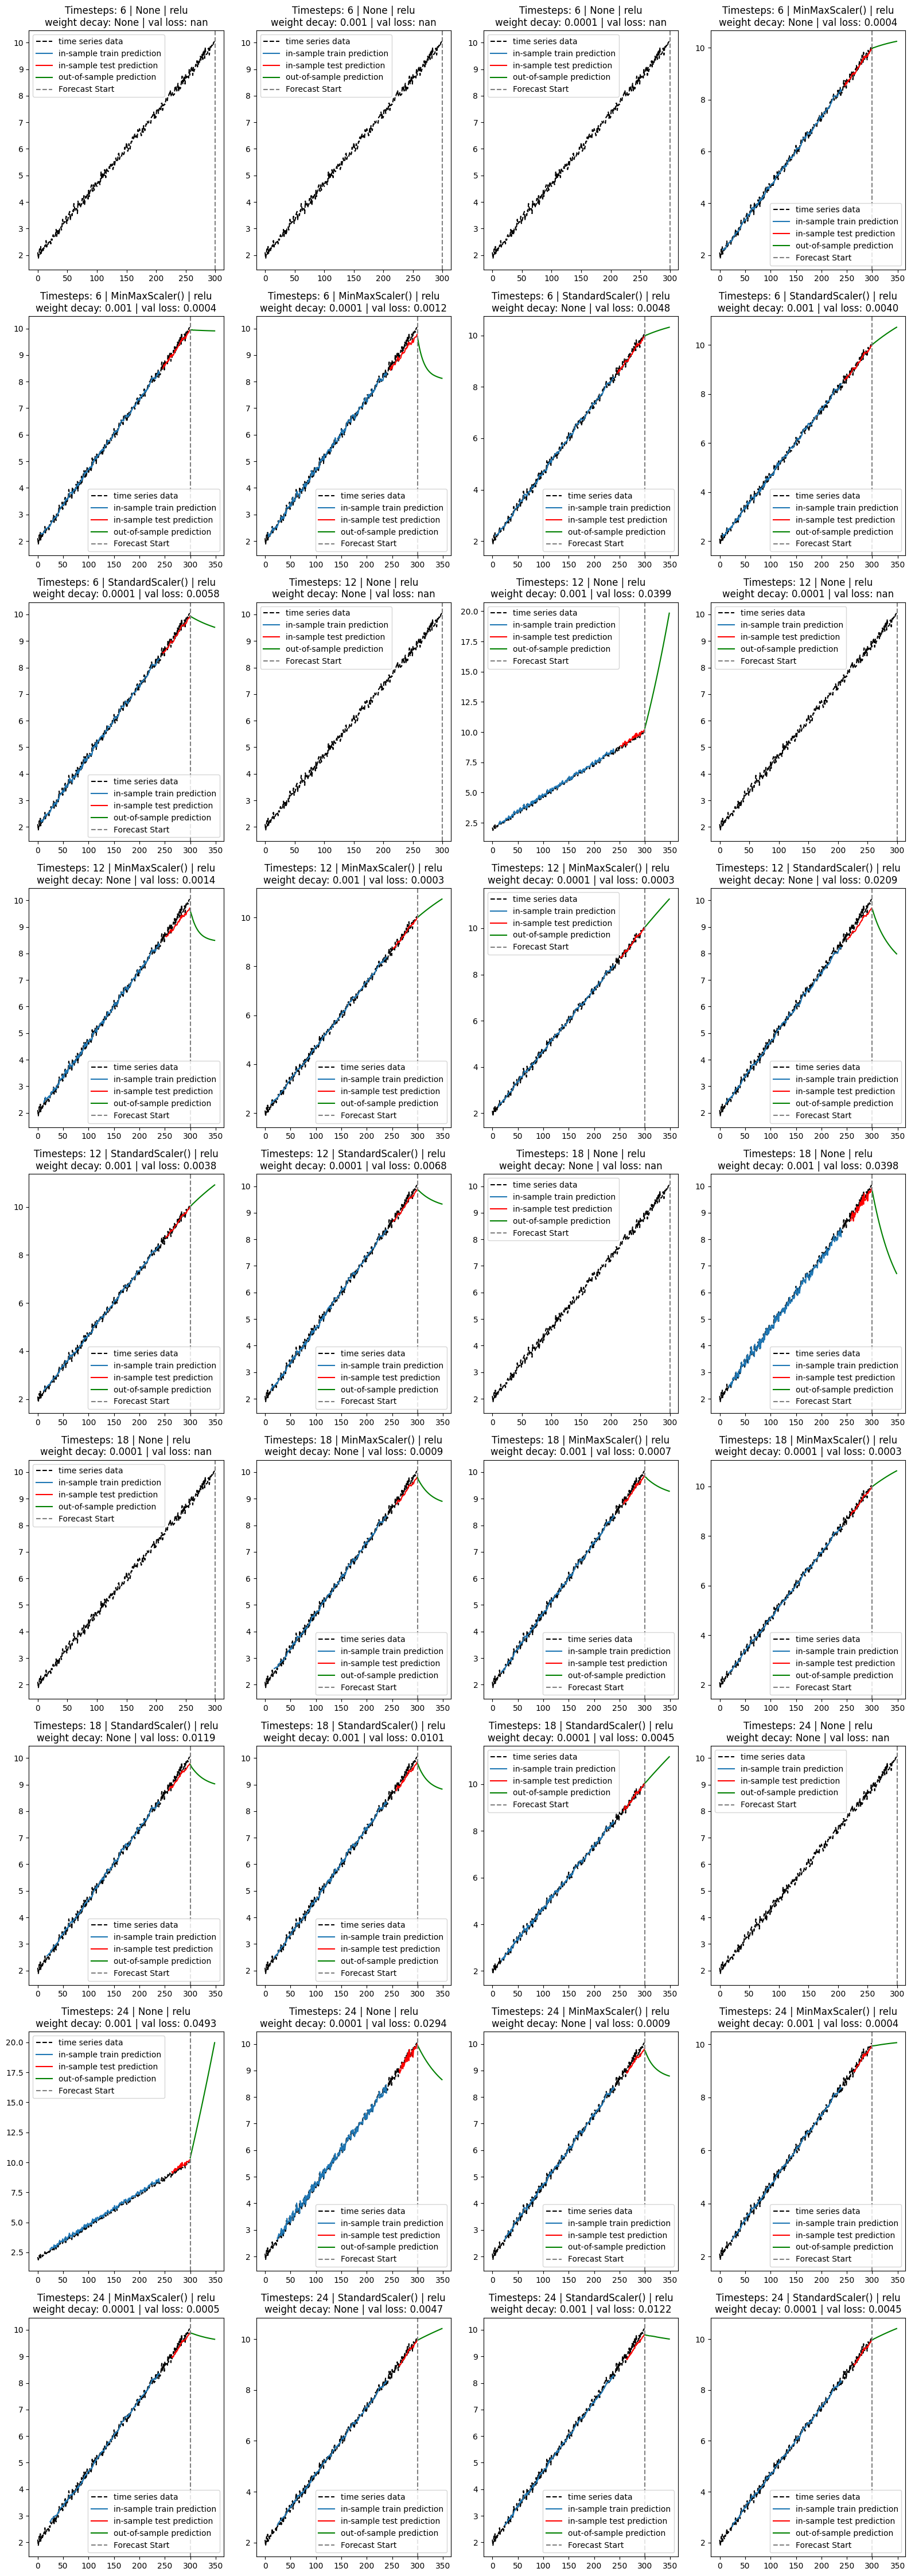

In [ ]:
Ts = [6, 12, 18, 24]
scalers = [None, MinMaxScaler(), StandardScaler()]
activations = ['relu']
weight_decays = [None, 0.001, 0.0001]
D = 1

experiment(D, Ts, scalers, activations, weight_decays, learning_rates = [0.01], future_steps = 50)

## Predicting Seasonality Only

In [ ]:
n_steps = 240
trend_min = 0.0
trend_max = 0.0
trend_var = 0.0
season_period = 12
season_cycle = 10
season_var = 0.1

trends, seasonalities, time_series = generate_time_series(n_steps = n_steps,
                                                          trend_min = trend_min,
                                                          trend_max = trend_max,
                                                          trend_var = trend_var,
                                                          season_period = season_period,
                                                          season_cycle = season_cycle,
                                                          season_var = season_var
                                                        )

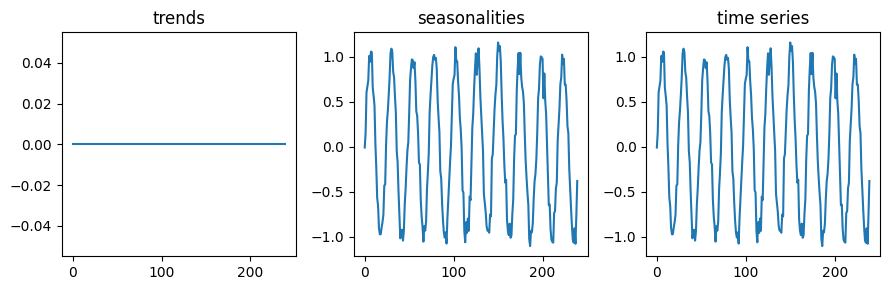

In [ ]:
plot_time_series(trends, seasonalities, time_series)

Shape of X Train: (186, 6, 1) | Shape of Y Train: (186,)
Shape of X Test: (42, 6, 1) | Shape of Y Test: (42,)
Shape of X Train: (186, 6, 1) | Shape of Y Train: (186,)
Shape of X Test: (42, 6, 1) | Shape of Y Test: (42,)
Shape of X Train: (186, 6, 1) | Shape of Y Train: (186,)
Shape of X Test: (42, 6, 1) | Shape of Y Test: (42,)
Shape of X Train: (186, 6, 1) | Shape of Y Train: (186,)
Shape of X Test: (42, 6, 1) | Shape of Y Test: (42,)
Shape of X Train: (186, 6, 1) | Shape of Y Train: (186,)
Shape of X Test: (42, 6, 1) | Shape of Y Test: (42,)
Shape of X Train: (186, 6, 1) | Shape of Y Train: (186,)
Shape of X Test: (42, 6, 1) | Shape of Y Test: (42,)
Shape of X Train: (186, 6, 1) | Shape of Y Train: (186,)
Shape of X Test: (42, 6, 1) | Shape of Y Test: (42,)
Shape of X Train: (186, 6, 1) | Shape of Y Train: (186,)
Shape of X Test: (42, 6, 1) | Shape of Y Test: (42,)
Shape of X Train: (186, 6, 1) | Shape of Y Train: (186,)
Shape of X Test: (42, 6, 1) | Shape of Y Test: (42,)
Shape of X

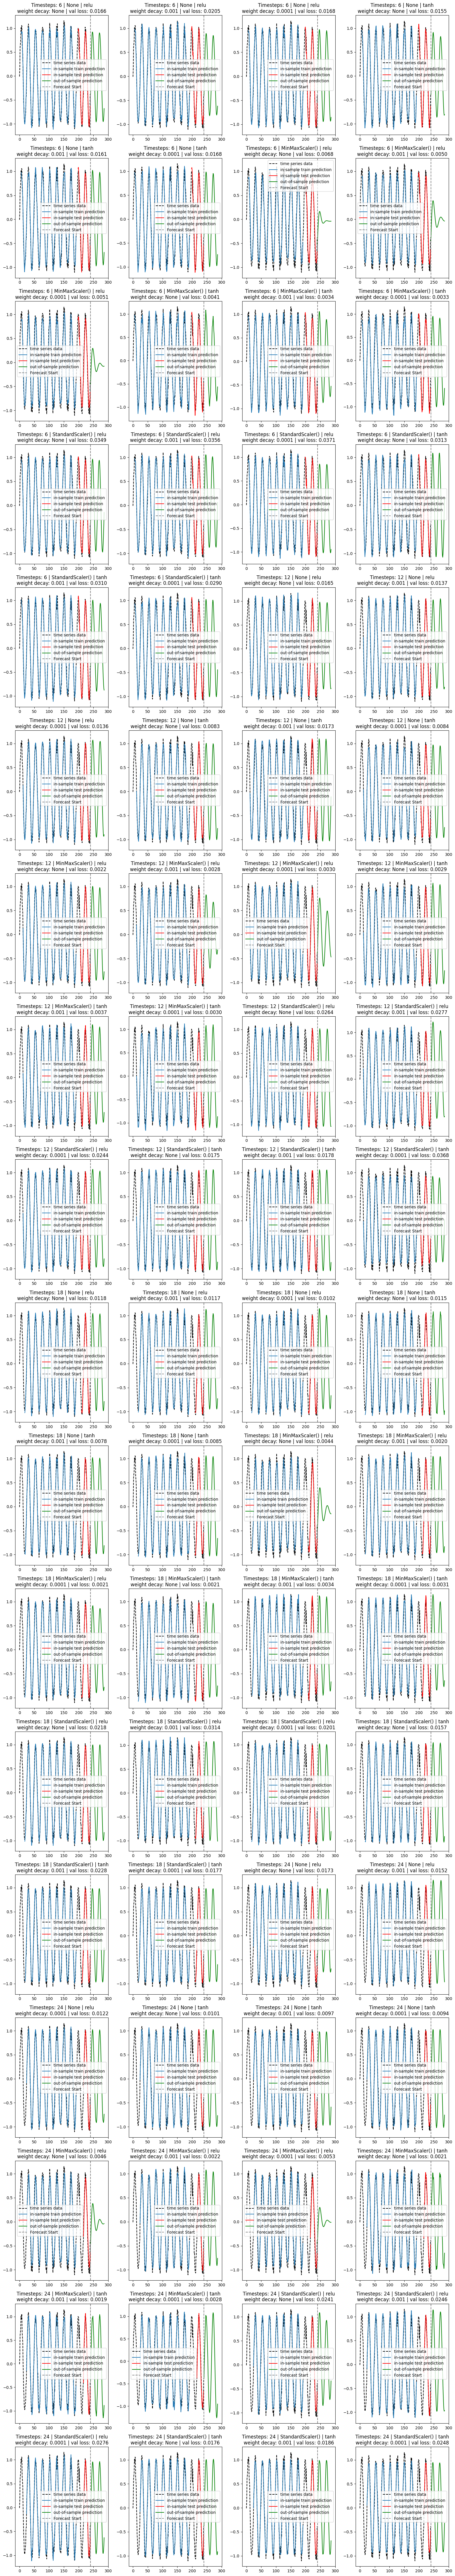

In [ ]:
Ts = [6, 12, 18, 24]
scalers = [None, MinMaxScaler(), StandardScaler()]
activations = ['relu', 'tanh']
weight_decays = [None, 0.001, 0.0001]
D = 1

experiment(D, Ts, scalers, activations, weight_decays, learning_rates = [0.01], future_steps = 48)

## Predicting Composite Time Series

In [ ]:
n_steps = 240
trend_min = 2.0
trend_max = 10.0
trend_var = 0.1
season_period = 12
season_cycle = 10
season_var = 0.1

trends, seasonalities, time_series = generate_time_series(n_steps = n_steps,
                                                          trend_min = trend_min,
                                                          trend_max = trend_max,
                                                          trend_var = trend_var,
                                                          season_period = season_period,
                                                          season_cycle = season_cycle,
                                                          season_var = season_var
                                                        )

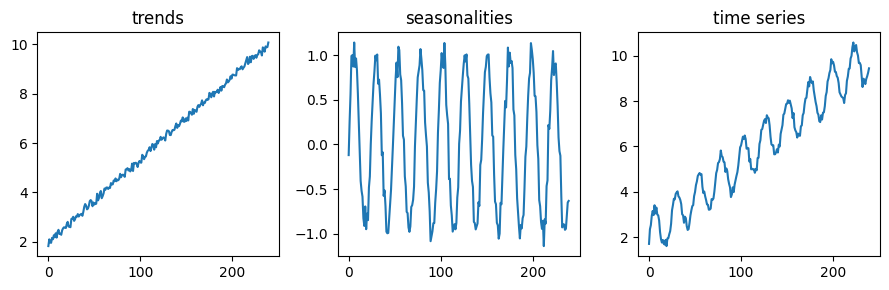

In [ ]:
plot_time_series(trends, seasonalities, time_series)

Shape of X Train: (180, 12, 1) | Shape of Y Train: (180,)
Shape of X Test: (36, 12, 1) | Shape of Y Test: (36,)
Shape of X Train: (180, 12, 1) | Shape of Y Train: (180,)
Shape of X Test: (36, 12, 1) | Shape of Y Test: (36,)
Shape of X Train: (180, 12, 1) | Shape of Y Train: (180,)
Shape of X Test: (36, 12, 1) | Shape of Y Test: (36,)
Shape of X Train: (180, 12, 1) | Shape of Y Train: (180,)
Shape of X Test: (36, 12, 1) | Shape of Y Test: (36,)
Shape of X Train: (180, 12, 1) | Shape of Y Train: (180,)
Shape of X Test: (36, 12, 1) | Shape of Y Test: (36,)
Shape of X Train: (180, 12, 1) | Shape of Y Train: (180,)
Shape of X Test: (36, 12, 1) | Shape of Y Test: (36,)
Shape of X Train: (180, 12, 1) | Shape of Y Train: (180,)
Shape of X Test: (36, 12, 1) | Shape of Y Test: (36,)
Shape of X Train: (180, 12, 1) | Shape of Y Train: (180,)
Shape of X Test: (36, 12, 1) | Shape of Y Test: (36,)
Shape of X Train: (174, 18, 1) | Shape of Y Train: (174,)
Shape of X Test: (30, 18, 1) | Shape of Y Test

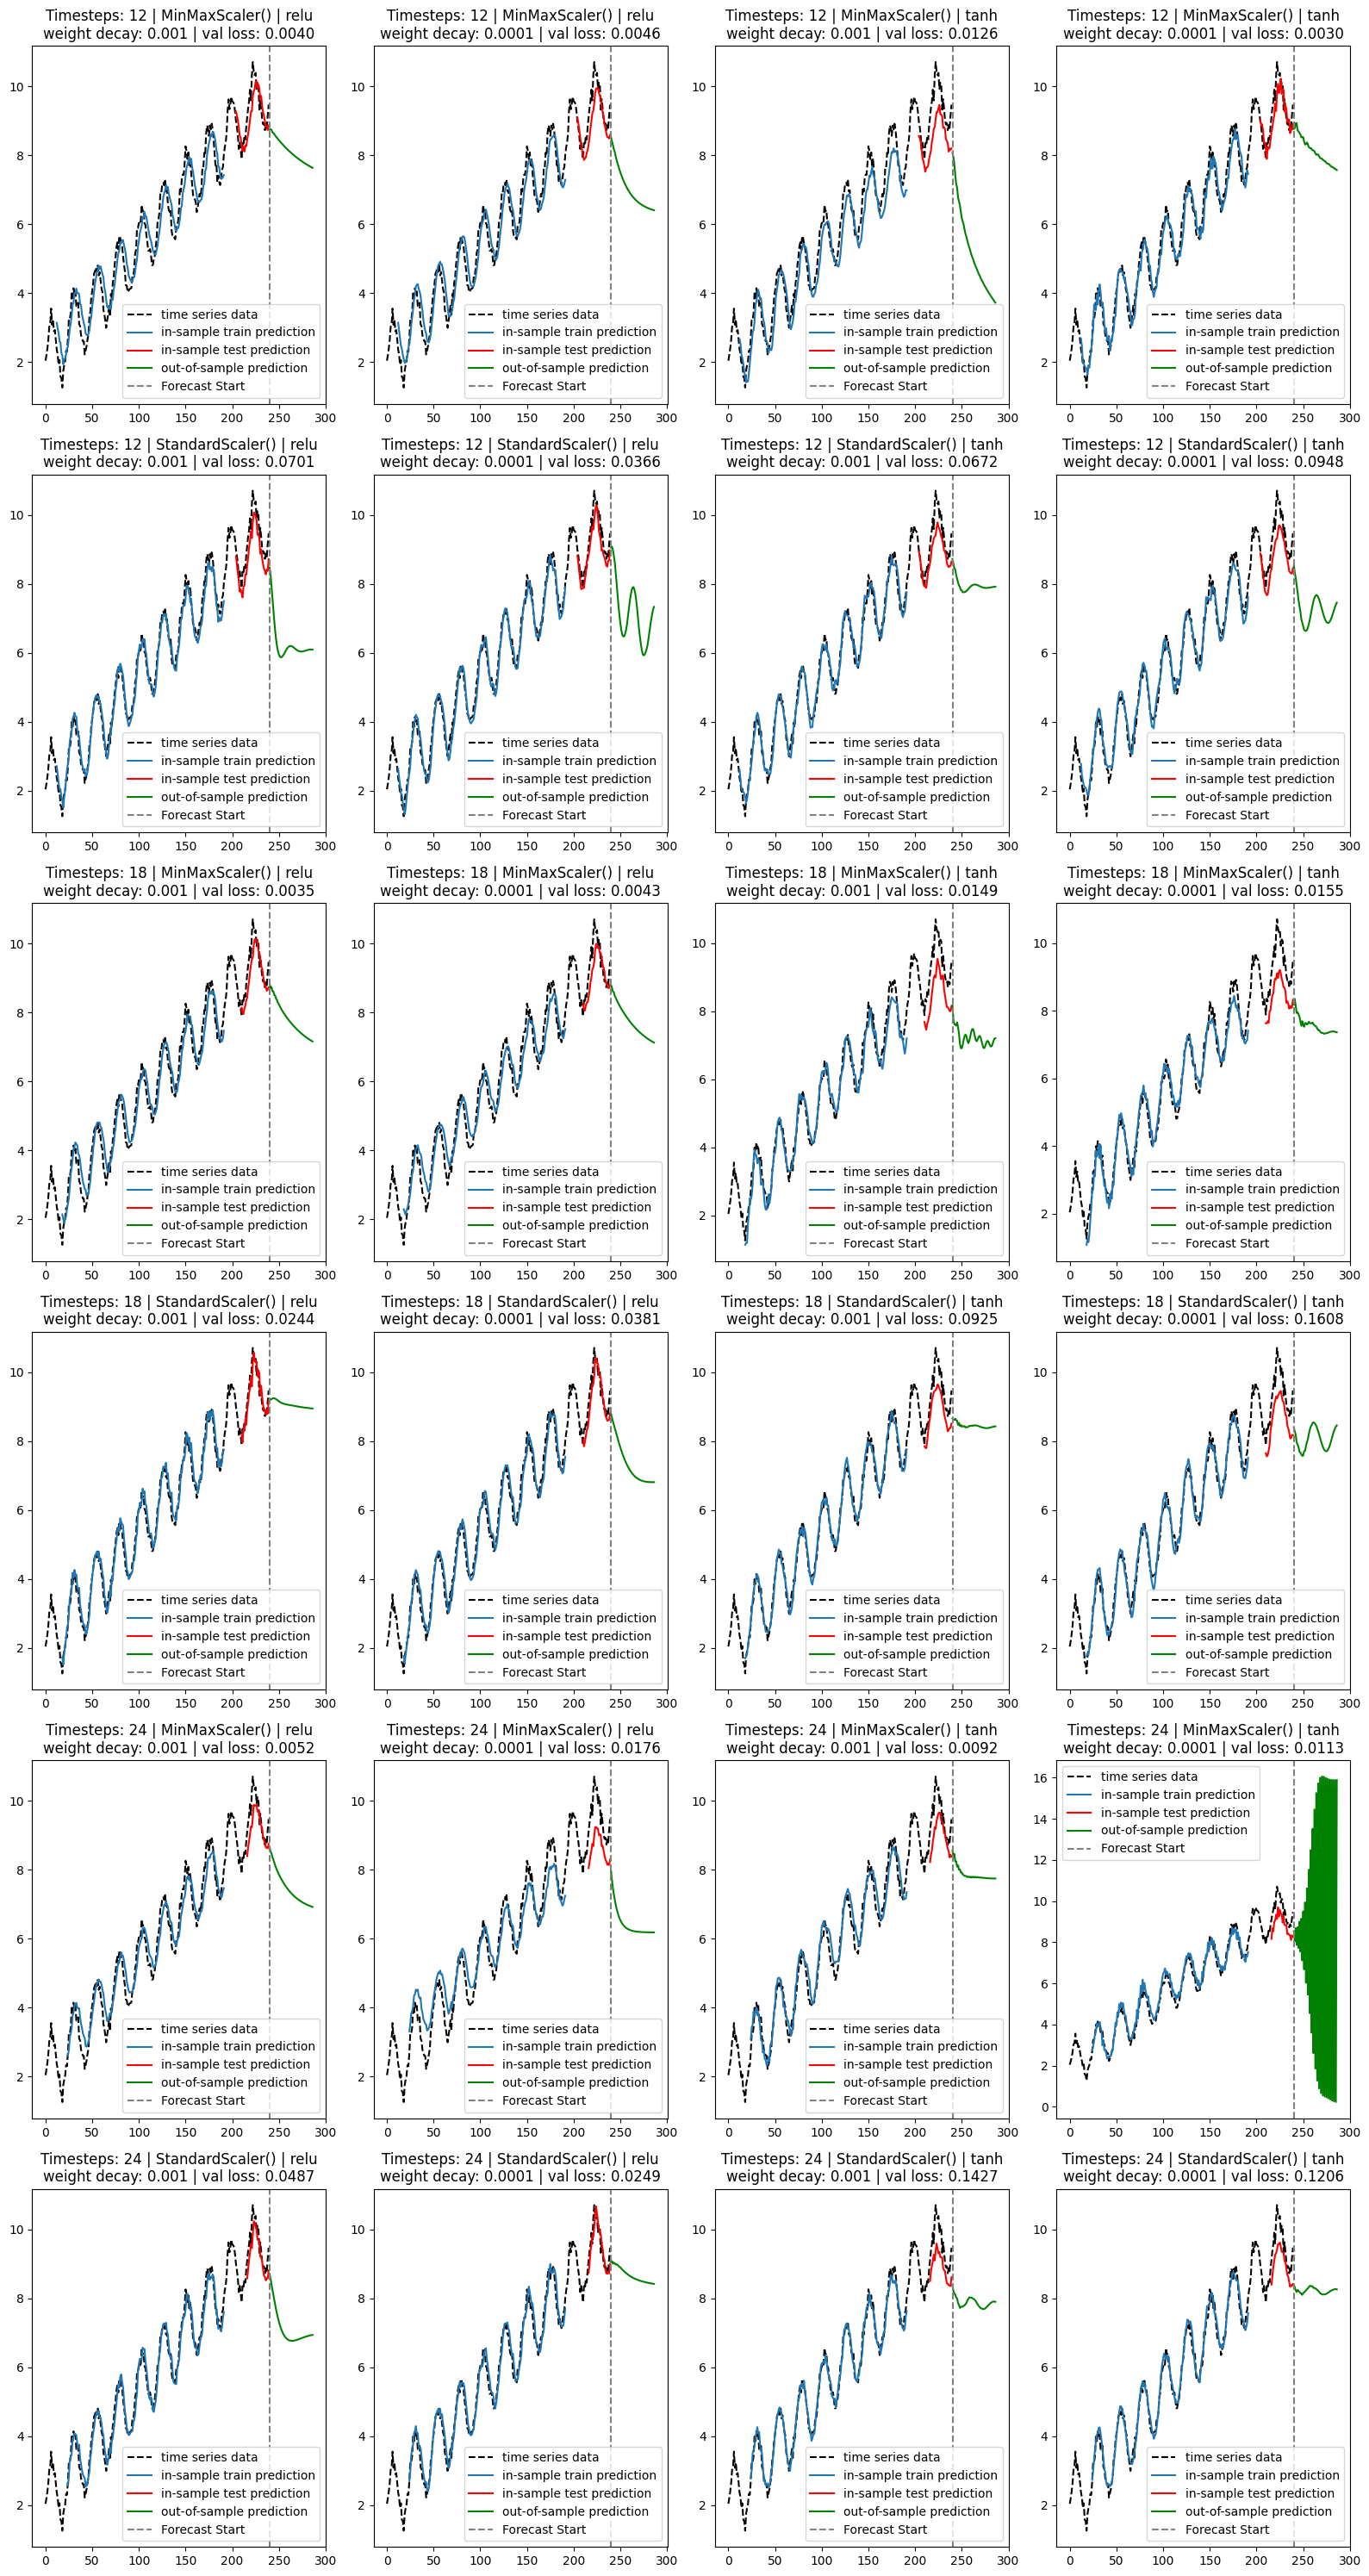

In [ ]:
Ts = [12, 18, 24]
scalers = [MinMaxScaler(), StandardScaler()]
activations = ['relu', 'tanh']
weight_decays = [0.001, 0.0001]
D = 1

experiment(D, Ts, scalers, activations, weight_decays, learning_rates = [0.01], future_steps = 48)

In [ ]:
model = rnn_model(12, 1, 'relu', SGD(learning_rate = 0.01, weight_decay = 0.0001))

In [ ]:
model.summary()

Model: "functional_270"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_277 (InputLayer)         │ (None, 12, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_33 (GRU)                         │ (None, 12, 100)             │          30,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 10, 16)              │           4,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 5, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_274 (Dense)                    │ (None, 5, 1)                │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,733 (139.58 KB)

 Trainable params: 35,733 (139.58 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train, y_train, X_test, y_test = prepare_dataset(time_series)

Shape of X Train: (180, 12, 1) | Shape of Y Train: (180,)
Shape of X Test: (36, 12, 1) | Shape of Y Test: (36,)


Shape of X Train: (180, 12, 1) | Shape of Y Train: (180,)
Shape of X Test: (36, 12, 1) | Shape of Y Test: (36,)
Shape of X Train: (180, 12, 1) | Shape of Y Train: (180,)
Shape of X Test: (36, 12, 1) | Shape of Y Test: (36,)
Shape of X Train: (174, 18, 1) | Shape of Y Train: (174,)
Shape of X Test: (30, 18, 1) | Shape of Y Test: (30,)
Shape of X Train: (174, 18, 1) | Shape of Y Train: (174,)
Shape of X Test: (30, 18, 1) | Shape of Y Test: (30,)


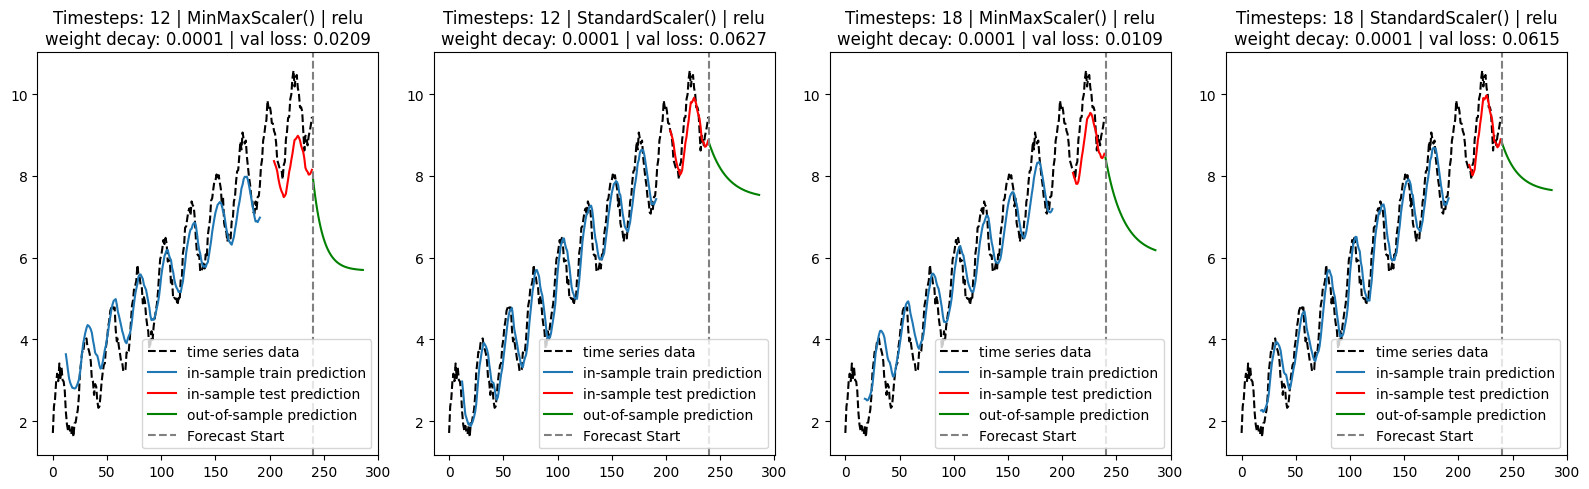

In [ ]:
Ts = [12, 18]
scalers = [MinMaxScaler(), StandardScaler()]
activations = ['relu']
weight_decays = [0.0001]
D = 1

experiment(D, Ts, scalers, activations, weight_decays, learning_rates = [0.01], future_steps = 48)

In [ ]:
i = Input(shape = (T, D))
x = SimpleRNN(100, activation = 'relu')(i)
x = Dense(1)(x)

model = Model(i, x)

In [ ]:
i = Input(shape = (T, D))
x = GRU(100, activation = 'tanh', return_sequences = True)(i)
x = GRU(100, activation = 'tanh')(x)
x = Dense(1)(x)

model = Model(i, x)

In [ ]:
i = Input(shape = (T, D))
x = Conv1D(filters = 16, kernel_size = 3, activation = 'relu')(i)
x = MaxPooling1D(pool_size = 2)(x)
#x = Conv1D(filters = 16, kernel_size = 3, activation = 'relu')(x)
#x = MaxPooling1D(pool_size = 2)(x)
#x = GRU(100, activation = 'tanh', return_sequences = True)(x)
x = GRU(100, activation = 'relu', return_sequences = False)(x)

x = Dense(1)(x)

model = Model(i, x)

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate = 0.001))

In [ ]:
result = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 8, epochs = 60)

Epoch 1/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 23.0164 - val_loss: 6.0541
Epoch 2/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4722 - val_loss: 0.6817
Epoch 3/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5068 - val_loss: 0.3805
Epoch 4/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4411 - val_loss: 0.3484
Epoch 5/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3893 - val_loss: 0.3179
Epoch 6/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3507 - val_loss: 0.3128
Epoch 7/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3294 - val_loss: 0.2946
Epoch 8/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3120 - val_loss: 0.3225
Epoch 9/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2751 - val_loss: 0.3442
Epoch 10/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3343 - val_loss: 0.3159
Epoch 11/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2839 - val_loss: 0.2148
Epoch 12/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3126 - 

In [ ]:
in_sample_predictions = []
i = 0

while len(in_sample_predictions) < len(X_train):
    predict = model.predict(X_train[i].reshape(1, -1, 1), verbose = 0)[0, 0]
    i+= 1

    in_sample_predictions.append(predict)

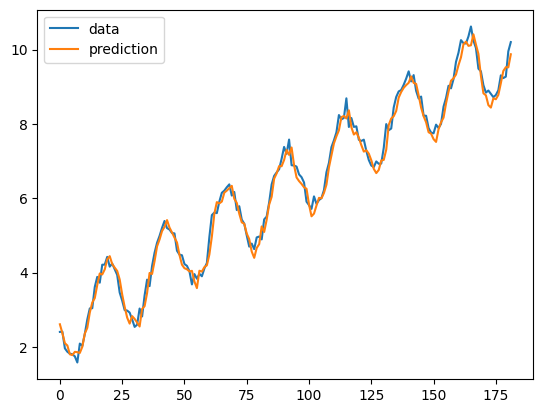

In [ ]:
plt.plot(y_train, label = 'data')
plt.plot(in_sample_predictions, label = 'prediction')
plt.legend()
plt.show();

In [ ]:
out_of_sample_predictions = []
future_steps = 24
input_X = X_train[-1]

while len(out_of_sample_predictions) < X_test.shape[0] + future_steps:
    predict = model.predict(input_X.reshape(1, -1, 1), verbose = 0)[0, 0]

    out_of_sample_predictions.append(predict)

    input_X = np.roll(input_X, -1)
    input_X[-1] = predict

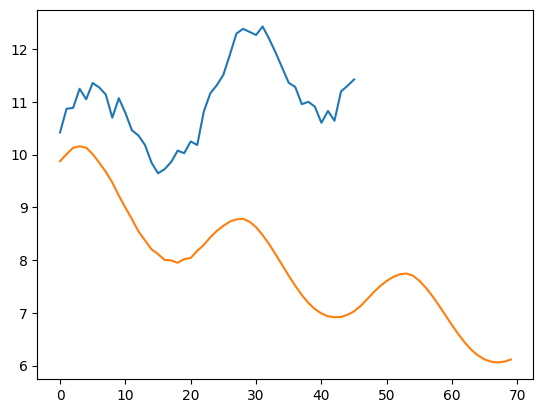

In [ ]:
plt.plot(y_test)
plt.plot(out_of_sample_predictions)
plt.show();